Carga del archivo JSON
    • Cargue el archivo pokemonDB_dataset.json usando la
librería json o pandas.
    • Explore su estructura inicial (keys(), items()) para
entender su jerarquía.

In [17]:
import pandas as pd
import json

In [18]:
with open('pokemonDB_dataset.json') as json_data:
    data =json.load(json_data)
    
poke = pd.DataFrame.from_dict(data, orient='index') #dataframe desde el diccionario
print(poke.keys())
poke.items()


Index(['Type', 'Species', 'Height', 'Weight', 'Abilities', 'EV Yield',
       'Catch Rate', 'Base Friendship', 'Base Exp', 'Growth Rate',
       'Egg Groups', 'Gender', 'Egg Cycles', 'HP Base', 'HP Min', 'HP Max',
       'Attack Base', 'Attack Min', 'Attack Max', 'Defense Base',
       'Defense Min', 'Defense Max', 'Special Attack Base',
       'Special Attack Min', 'Special Attack Max', 'Special Defense Base',
       'Special Defense Min', 'Special Defense Max', 'Speed Base', 'Speed Min',
       'Speed Max'],
      dtype='object')


<generator object DataFrame.items at 0x000001F4C2456A70>

    • Use df.info() y df.describe(include='all') para
identificar tipos de datos.
    • Determine cuántas variables son numéricas y cuántas
categóricas.

In [19]:
print("Info")
poke.info()
print("Describe\n")
print(poke.describe(include='all'))

Val_num = poke.select_dtypes(include=['number']).columns.tolist()
Val_cat = poke.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print(f"\n Variables numéricas = ", len(Val_num), Val_num)
print(f"\n Variables categóricas = ", len(Val_cat), Val_cat)

Info
<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Type                  1215 non-null   object
 1   Species               1215 non-null   object
 2   Height                1215 non-null   object
 3   Weight                1215 non-null   object
 4   Abilities             1215 non-null   object
 5   EV Yield              1215 non-null   object
 6   Catch Rate            1215 non-null   object
 7   Base Friendship       1215 non-null   object
 8   Base Exp              1215 non-null   object
 9   Growth Rate           1215 non-null   object
 10  Egg Groups            1215 non-null   object
 11  Gender                1215 non-null   object
 12  Egg Cycles            1215 non-null   object
 13  HP Base               1215 non-null   object
 14  HP Min                1215 non-null   object
 15  HP Max      

    Convierta columnas como "Height", "Weight", "HP Base", "Attack
Base", "Defense Base", etc., a valores numéricos.
    Elimine unidades (“m”, “kg”, “lbs”) y convierta los campos a
tipo float.
    Separe las columnas compuestas, por ejemplo:
"Type" → Type1, Type2
"Gender" → Male (%), Female (%)

In [20]:
print(poke.columns.tolist)
poke['H_m'] = poke['Height'].str.extract(r'([\d\.]+)').astype(float) #extrae el valor numérico de la columna Height y lo convierte a float
poke['W_kg'] = poke['Weight'].str.extract(r'([\d\.]+)').astype(float) #extrae el valor numérico de la columna Weight y lo convierte a float

st_cols = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base', 'Special Attack Base', 'Special Defense Base',"Base Exp"]
for col in st_cols:
    poke[col] = pd.to_numeric(poke[col], errors='coerce')

poke[['Type1', 'Type2']] = poke['Type'].str.split(',', expand=True) #separa en 2 columnas el campo Type
poke['Type1'] = poke['Type1'].str.strip() #elimina espacios en blanco al inicio y final
poke['Type2'] = poke['Type2'].str.strip()

poke[['Male_%', 'Female_%']] = poke['Gender'].str.extract(r'(\d+\.?\d*)% male, (\d+\.?\d*)% female') #extrae los valores numéricos de la columna Gender
poke['Male_%'] = poke['Male_%'].astype(float)
poke['Female_%'] = poke['Female_%'].astype(float)


<bound method IndexOpsMixin.tolist of Index(['Type', 'Species', 'Height', 'Weight', 'Abilities', 'EV Yield',
       'Catch Rate', 'Base Friendship', 'Base Exp', 'Growth Rate',
       'Egg Groups', 'Gender', 'Egg Cycles', 'HP Base', 'HP Min', 'HP Max',
       'Attack Base', 'Attack Min', 'Attack Max', 'Defense Base',
       'Defense Min', 'Defense Max', 'Special Attack Base',
       'Special Attack Min', 'Special Attack Max', 'Special Defense Base',
       'Special Defense Min', 'Special Defense Max', 'Speed Base', 'Speed Min',
       'Speed Max'],
      dtype='object')>


                    Verifique valores nulos y duros:
    • Cree un nuevo DataFrame df_clean con los campos limpios
listos para análisis:
["Type1", "Type2", "HP Base", "Attack Base", "Defense
Base", "Speed Base", "Height_m", "Weight_kg", "Base
Exp"]


In [21]:
poke_clean = poke[["Type1", "Type2", "HP Base", "Attack Base", "Defense Base", "Speed Base", "H_m", "W_kg", "Special Attack Base", "Special Defense Base", "Base Exp"]]
poke_clean.info()
print(poke_clean.isnull().sum()) #verifica valores nulos, si hay los elimina o los maneja según convenga

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, Abomasnow to Zygarde Complete Forme
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type1                 1215 non-null   object 
 1   Type2                 669 non-null    object 
 2   HP Base               1215 non-null   int64  
 3   Attack Base           1215 non-null   int64  
 4   Defense Base          1215 non-null   int64  
 5   Speed Base            1215 non-null   int64  
 6   H_m                   1215 non-null   float64
 7   W_kg                  1214 non-null   float64
 8   Special Attack Base   1215 non-null   int64  
 9   Special Defense Base  1215 non-null   int64  
 10  Base Exp              1192 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 113.9+ KB
Type1                     0
Type2                   546
HP Base                   0
Attack Base               0
Defense Base              0
Speed

ETAPA 2 EDA

1. Análisis estadístico
¿Cuál es el promedio, mínimo y máximo de los atributos base (HP,
Attack, Defense, Speed) de todos los Pokémon?


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


poke_clean[["HP Base","Attack Base","Defense Base","Speed Base","Special Attack Base","Special Defense Base"]].agg(["mean","min","max"]).round(2) 

,HP Base,Attack Base,Defense Base,Speed Base,Special Attack Base,Special Defense Base
mean,71.24,81.15,75.01,70.03,73.22,72.44
min,1.00,5.00,5.00,5.00,10.00,20.00
max,255.00,190.00,250.00,200.00,194.00,250.00


2. Análisis gráfico
Cree un histograma para visualizar la distribución de los valores de
Base Exp.
Interprete si la distribución es simétrica o sesgada.

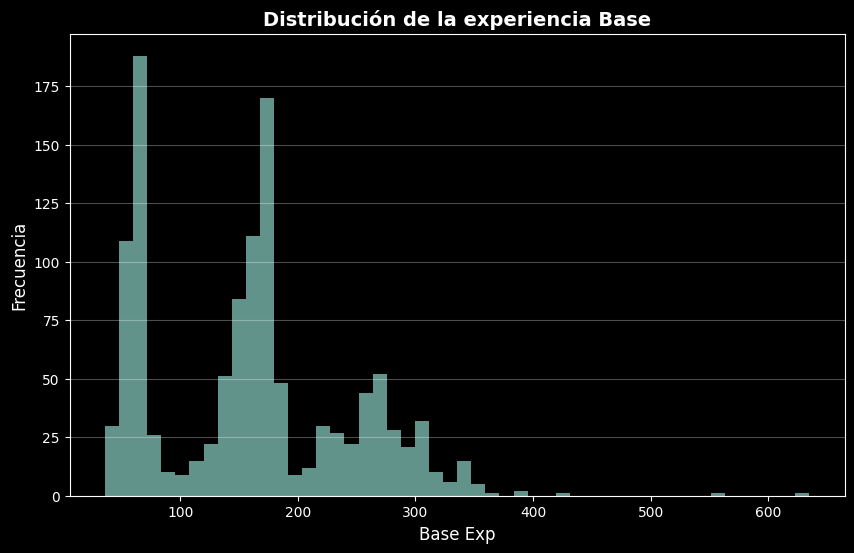

In [23]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
plt.hist(poke_clean['Base Exp'].dropna(), bins=50, alpha=0.7)
plt.xlabel('Base Exp', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la experiencia Base', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

3. Análisis gráfico
Realice un boxplot comparando los valores de Attack Base entre los
tipos principales (Type1).
Identifique qué tipo tiene Pokémon con ataques más altos en promedio.

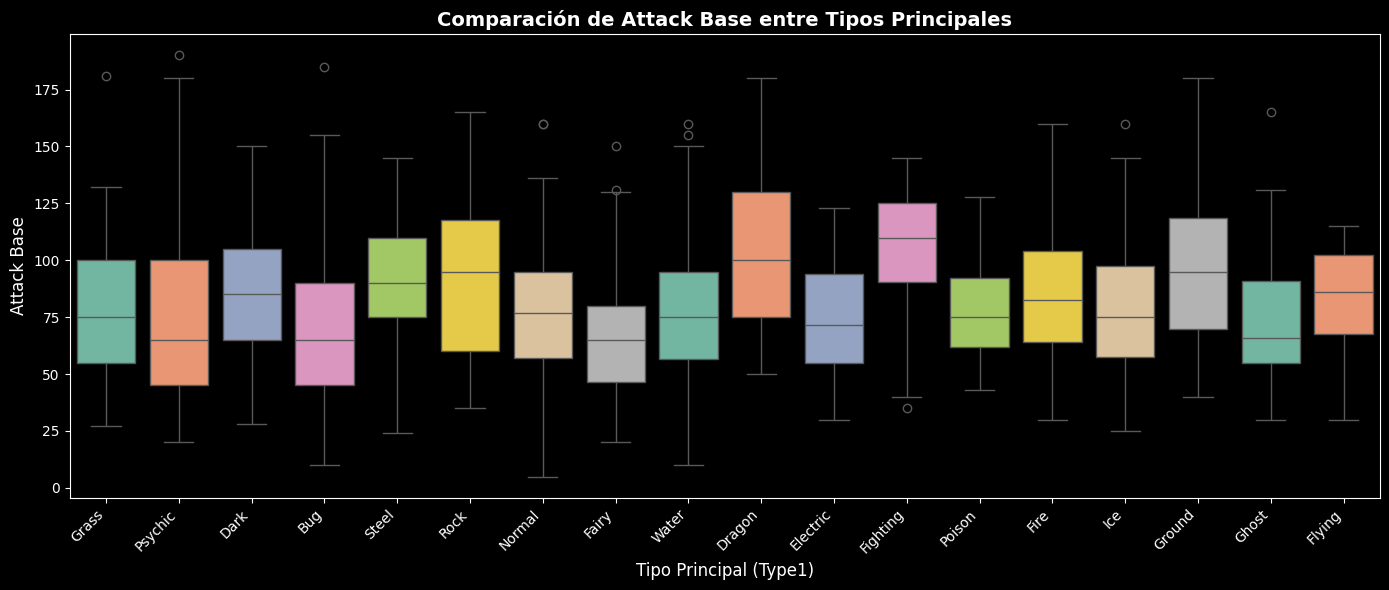


Top 5 tipos con mayor Attack Base promedio:
Type1
Fighting    104.960000
Dragon      103.816327
Ground       94.085106
Steel        92.511111
Rock         90.676471
Name: Attack Base, dtype: float64

El tipo con Pokémon más fuertes en ataque es: Fighting (104.96)


In [24]:
plt.figure(figsize=(14, 6))
poke_clean_sorted = poke_clean.sort_values('Attack Base', ascending=False)
sns.boxplot(data=poke_clean, x='Type1', y='Attack Base', hue="Type1", palette='Set2', )
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo Principal (Type1)', fontsize=12)
plt.ylabel('Attack Base', fontsize=12)
plt.title('Comparación de Attack Base entre Tipos Principales', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

atk_tipo = poke_clean.groupby('Type1')['Attack Base'].mean().sort_values(ascending=False)
print(f"\nTop 5 tipos con mayor Attack Base promedio:")
print(atk_tipo.head())
print(f"\nEl tipo con Pokémon más fuertes en ataque es: {atk_tipo.idxmax()} ({atk_tipo.max():.2f})")

4. Análisis estadístico
¿Cuál es el top 5 de especies (Species) más frecuentes en el dataset?

In [25]:
print(poke['Species'].value_counts().head())

Species
Paradox Pokémon    22
Mouse Pokémon      14
Fox Pokémon         9
Dragon Pokémon      9
Pumpkin Pokémon     8
Name: count, dtype: int64


5. Análisis gráfico
Genere un gráfico de barras que muestre la cantidad de Pokémon por
tipo principal (Type1).
¿Qué tipo es el más común?

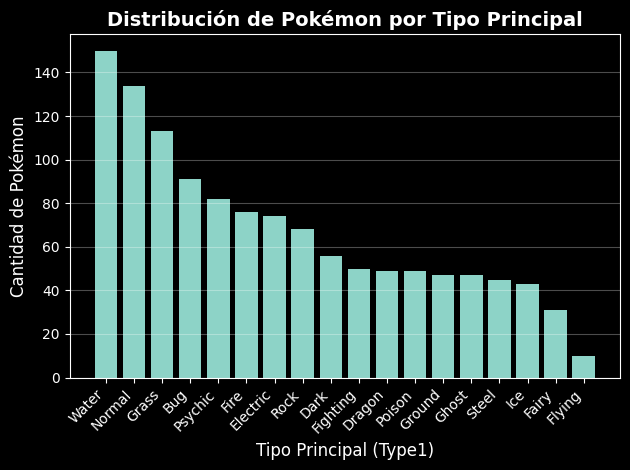

In [26]:
plt.bar(poke_clean['Type1'].value_counts().index, poke_clean['Type1'].value_counts().values)
plt.xlabel('Tipo Principal (Type1)', fontsize=12)
plt.ylabel('Cantidad de Pokémon', fontsize=12)
plt.title('Distribución de Pokémon por Tipo Principal', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Análisis estadístico
Calcule la correlación entre los atributos HP Base, Attack Base,
Defense Base y Speed Base.
¿Qué atributos están más correlacionados entre sí?

In [27]:
correlacion = poke_clean[['HP Base','Attack Base','Defense Base','Speed Base']].corr()
correlacion

,HP Base,Attack Base,Defense Base,Speed Base
HP Base,1.000000,0.461580,0.332312,0.181531
Attack Base,0.461580,1.000000,0.468231,0.375532
Defense Base,0.332312,0.468231,1.000000,0.017904
Speed Base,0.181531,0.375532,0.017904,1.000000


7. Análisis gráfico
Cree un heatmap (mapa de calor) con la matriz de correlaciones
obtenida en el punto anterior.
Interprete los resultados.


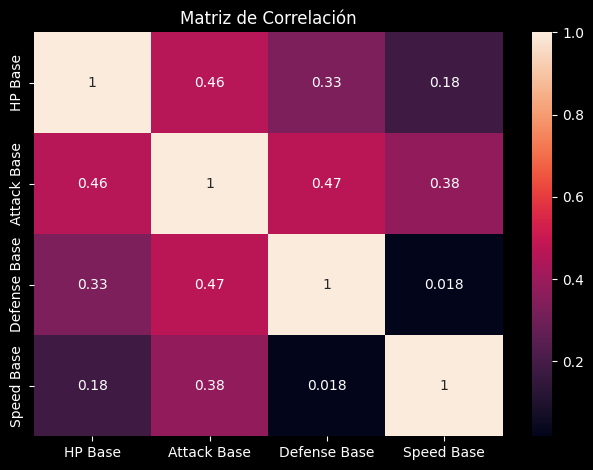

In [28]:
sns.heatmap(correlacion, annot=True)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()



8. Análisis gráfico
Realice un diagrama de dispersión (scatter plot) entre Weight_kg y
Attack Base.
¿Existe relación entre el peso de un Pokémon y su capacidad de ataque?

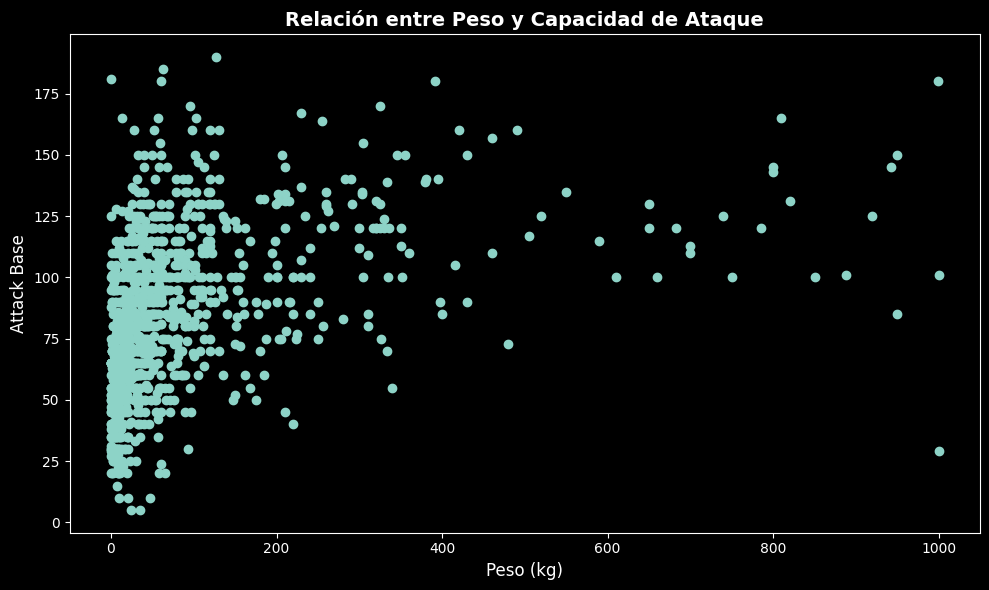

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(poke_clean['W_kg'], poke_clean['Attack Base'])
plt.xlabel('Peso (kg)', fontsize=12)
plt.ylabel('Attack Base', fontsize=12)
plt.title('Relación entre Peso y Capacidad de Ataque', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

9. Análisis estadístico
Determine el promedio de altura y peso por tipo principal (Type1).
Interprete cuál tipo tiende a tener Pokémon más grandes.


In [30]:
gigamax = poke_clean.groupby('Type1').agg({
    'H_m': 'mean',
    'W_kg': 'mean'
}).round(2).sort_values('W_kg', ascending=False)

print("\nPromedio de altura y peso por tipo (ordenado por peso):")
print(gigamax)

print(f"\nTipo con Pokémon más grandes (por peso): {gigamax['W_kg'].idxmax()}")
print(f"Peso promedio: {gigamax['W_kg'].max():.2f} kg")
print(f"\nTipo con Pokémon más altos: {gigamax['H_m'].idxmax()}")
print(f"Altura promedio: {gigamax['H_m'].max():.2f} m")


Promedio de altura y peso por tipo (ordenado por peso):
           H_m    W_kg
Type1                 
Steel     2.05  228.53
Ground    1.42  143.46
Ice       1.28  122.98
Dragon    2.04  121.13
Rock      1.33  115.11
Fighting  1.35   88.26
Psychic   1.37   76.74
Fire      1.24   74.18
Dark      1.23   70.95
Water     1.58   64.42
Poison    3.61   59.02
Ghost     1.19   58.35
Electric  1.05   46.15
Normal    1.05   43.25
Flying    1.20   40.97
Fairy     0.93   39.85
Grass     1.05   37.40
Bug       0.89   32.76

Tipo con Pokémon más grandes (por peso): Steel
Peso promedio: 228.53 kg

Tipo con Pokémon más altos: Poison
Altura promedio: 3.61 m


10. Análisis gráfico
Construya un gráfico de violín o boxplot múltiple comparando el
atributo Speed Base entre los tipos Flying, Electric y Ground.
¿Qué tipo de Pokémon tiende a ser más rápido?

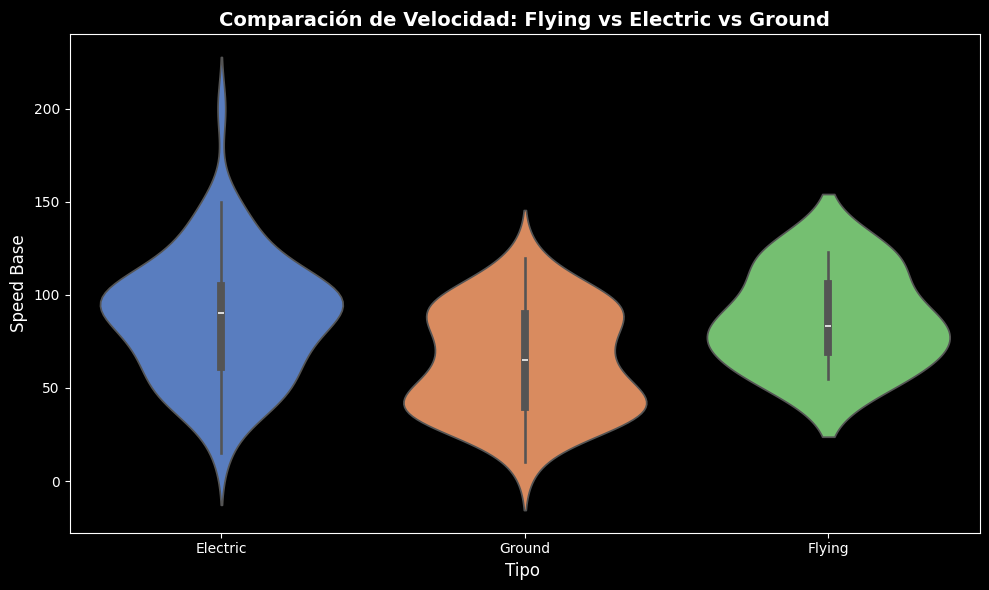

In [31]:
tiposobjetivo = ['Flying', 'Electric', 'Ground']
df_filtered = poke_clean[poke_clean['Type1'].isin(tiposobjetivo)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Type1', y='Speed Base', hue="Type1", palette='muted')
plt.xlabel('Tipo ', fontsize=12)
plt.ylabel('Speed Base', fontsize=12)
plt.title('Comparación de Velocidad: Flying vs Electric vs Ground', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
speed_stats = df_filtered.groupby('Type1')['Speed Base'].agg(['mean', 'median', 'std']).round(2)
print("\nEstadísticas de Speed Base por tipo:")
print(speed_stats)

fastest_type = df_filtered.groupby('Type1')['Speed Base'].mean().idxmax()
print(f"\nEl tipo más rápido en promedio es: {fastest_type}")


Estadísticas de Speed Base por tipo:
           mean  median    std
Type1                         
Electric  87.50    90.5  32.81
Flying    86.80    83.5  24.70
Ground    63.81    65.0  27.59

El tipo más rápido en promedio es: Electric
